In [5]:
!pip install %matplotlib

qwe


In [6]:
!pip install wordcloud

In [9]:
!pip install pandas

In [11]:
!pip install nltk

In [25]:
!pip install xlrd

In [15]:
import pandas as pd
import glob
import re
from functools import reduce
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS, WordCloud

In [18]:
all_files = glob.glob('myCabinetExcelData*.xls')
all_files

['myCabinetExcelData_1.xls',
 'myCabinetExcelData_10.xls',
 'myCabinetExcelData_2.xls',
 'myCabinetExcelData_3.xls',
 'myCabinetExcelData_4.xls',
 'myCabinetExcelData_5.xls',
 'myCabinetExcelData_6.xls',
 'myCabinetExcelData_7.xls',
 'myCabinetExcelData_8.xls',
 'myCabinetExcelData_9.xls']

In [27]:
all_files_data = []
for file in all_files:
    data_frame = pd.read_excel(file)
    all_files_data.append(data_frame)
all_files_data[0]

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Architecting Time-Critical Big-Data Systems,"Basanta-Val, P.; Audsley, N. C.; Wellings, A. ...",unknown,2016
1,NaN,2,Computation migration: a new approach to execu...,"Nunes, Rickey T. P.; Deshpande, Santosh L.",Inderscience,2018
2,NaN,3,Data Science and its Relationship to Big Data ...,unknown,Mary Ann Leibert,2013
3,NaN,4,"Bring it on, Big Data: Beyond the Hype",unknown,Mary Ann Leibert,2014
4,NaN,5,Mapping essential urban land use categories (E...,"Chen, Bin; Xu, Bing; Gong, Peng",John Wiley & Sons Ltd,2021
...,...,...,...,...,...,...
95,NaN,96,Health big data analytics: current perspective...,"Kuo, Mu-Hsing; Sahama, Tony; Kushniruk, Andre ...",Inderscience,2014
96,NaN,97,Scalable big data modelling,"Patel, Jayesh",Inderscience,2021
97,NaN,98,Intelligent big data analysis: a review,"Tsai, Chun-Wei; Yang, Ya-Lan; Chiang, Ming-Cha...",Inderscience,2014
98,NaN,99,Health big data analytics: current perspective...,"Kuo, Mu-Hsing; Sahama, Tony; Kushniruk, Andre ...",Inderscience,2014


In [30]:
all_files_data_concat = pd.concat(all_files_data, axis=0, ignore_index=True)
all_files_data_concat

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Architecting Time-Critical Big-Data Systems,"Basanta-Val, P.; Audsley, N. C.; Wellings, A. ...",unknown,2016
1,NaN,2,Computation migration: a new approach to execu...,"Nunes, Rickey T. P.; Deshpande, Santosh L.",Inderscience,2018
2,NaN,3,Data Science and its Relationship to Big Data ...,unknown,Mary Ann Leibert,2013
3,NaN,4,"Bring it on, Big Data: Beyond the Hype",unknown,Mary Ann Leibert,2014
4,NaN,5,Mapping essential urban land use categories (E...,"Chen, Bin; Xu, Bing; Gong, Peng",John Wiley & Sons Ltd,2021
...,...,...,...,...,...,...
995,NaN,96,Big Data—Go `Granular' to Boost Sales We look ...,unknown,TRSA,2019
996,NaN,97,Big Data: Its Meaning,"Reed, P.G.",unknown,2018
997,NaN,98,Big Data: Promises and Problems,"Gudivada, V. N.; Baeza-Yates, R.; Raghavan, V. V.",IEEE INSTITUTE OF ELECTRICAL AND ELECTRONICS,2015
998,NaN,99,Big data: why ignorance is no longer acceptable,"Toozs-Hobson, P.; Toozs-Hobson, N.; Kelley, T.",unknown,2018


In [33]:
all_files_data_concat.to_csv('irss_bigdata.csv', encoding='utf-8', index=False)

In [35]:
all_title = all_files_data_concat['제목']
all_title

0            Architecting Time-Critical Big-Data Systems
1      Computation migration: a new approach to execu...
2      Data Science and its Relationship to Big Data ...
3                 Bring it on, Big Data: Beyond the Hype
4      Mapping essential urban land use categories (E...
                             ...                        
995    Big Data—Go `Granular' to Boost Sales We look ...
996                                Big Data: Its Meaning
997                      Big Data: Promises and Problems
998      Big data: why ignorance is no longer acceptable
999    Big Data and the Ownership in Data: Recent Dev...
Name: 제목, Length: 1000, dtype: object

In [39]:
import nltk
nltk.download('stopwords')
stopWords = set(stopwords.words("english"))
lemma = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jinu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [45]:
nltk.download('punkt')
nltk.download('wordnet')
words = []
for title in all_title:
    EnWords = re.sub(r"[^a-zA-Z]+", " ", str(title))
    EnWordsToken = word_tokenize(EnWords.lower())
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords]
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop]
    words.append(EnWordsTokenStopLemma)
print(words)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Jinu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Jinu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


[['architecting', 'time', 'critical', 'big', 'data', 'system'], ['computation', 'migration', 'new', 'approach', 'execute', 'big', 'data', 'bioinformatics', 'workflow'], ['data', 'science', 'relationship', 'big', 'data', 'data', 'driven', 'decision', 'making'], ['bring', 'big', 'data', 'beyond', 'hype'], ['mapping', 'essential', 'urban', 'land', 'use', 'category', 'euluc', 'using', 'geospatial', 'big', 'data', 'progress', 'challenge', 'opportunity'], ['big', 'boe', 'fusing', 'spanish', 'official', 'gazette', 'big', 'data', 'technology'], ['structural', 'consequence', 'big', 'data', 'driven', 'education'], ['call', 'special', 'issue', 'paper', 'big', 'data', 'driven', 'futuristic', 'fabric', 'system', 'societal', 'digital', 'transformation'], ['computational', 'propaganda', 'political', 'big', 'data', 'moving', 'toward', 'critical', 'research', 'agenda'], ['big', 'data', 'new', 'method', 'idea', 'geological', 'scientific', 'research'], ['author', 'response', 'gong', 'comment', 'data', 's

In [52]:
words2 = list(reduce(lambda x, y: x+y, words))
print(words2)

['architecting', 'time', 'critical', 'big', 'data', 'system', 'computation', 'migration', 'new', 'approach', 'execute', 'big', 'data', 'bioinformatics', 'workflow', 'data', 'science', 'relationship', 'big', 'data', 'data', 'driven', 'decision', 'making', 'bring', 'big', 'data', 'beyond', 'hype', 'mapping', 'essential', 'urban', 'land', 'use', 'category', 'euluc', 'using', 'geospatial', 'big', 'data', 'progress', 'challenge', 'opportunity', 'big', 'boe', 'fusing', 'spanish', 'official', 'gazette', 'big', 'data', 'technology', 'structural', 'consequence', 'big', 'data', 'driven', 'education', 'call', 'special', 'issue', 'paper', 'big', 'data', 'driven', 'futuristic', 'fabric', 'system', 'societal', 'digital', 'transformation', 'computational', 'propaganda', 'political', 'big', 'data', 'moving', 'toward', 'critical', 'research', 'agenda', 'big', 'data', 'new', 'method', 'idea', 'geological', 'scientific', 'research', 'author', 'response', 'gong', 'comment', 'data', 'science', 'relationshi

In [53]:
count = Counter(words2)
count

Counter({'architecting': 1,
         'time': 19,
         'critical': 6,
         'big': 1120,
         'data': 1241,
         'system': 52,
         'computation': 3,
         'migration': 1,
         'new': 39,
         'approach': 49,
         'execute': 1,
         'bioinformatics': 1,
         'workflow': 2,
         'science': 39,
         'relationship': 7,
         'driven': 48,
         'decision': 10,
         'making': 11,
         'bring': 1,
         'beyond': 4,
         'hype': 2,
         'mapping': 6,
         'essential': 1,
         'urban': 7,
         'land': 1,
         'use': 19,
         'category': 1,
         'euluc': 1,
         'using': 63,
         'geospatial': 5,
         'progress': 2,
         'challenge': 49,
         'opportunity': 29,
         'boe': 1,
         'fusing': 1,
         'spanish': 1,
         'official': 1,
         'gazette': 1,
         'technology': 24,
         'structural': 4,
         'consequence': 2,
         'education': 5,
   

In [67]:
word_count = dict()
for tag, counts in count.most_common(50):
    if (len(str(tag)) > 1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

data : 1241
big : 1120
analytics : 111
analysis : 85
based : 85
using : 63
system : 52
approach : 49
challenge : 49
model : 49
driven : 48
learning : 43
application : 40
new : 39
science : 39
earth : 38
framework : 33
management : 33
platform : 33
issue : 31
health : 31
processing : 31
opportunity : 29
review : 29
algorithm : 29
cloud : 28
era : 26
perspective : 26
information : 26
technology : 24
research : 24
distributed : 24
computing : 24
machine : 24
network : 24
survey : 23
service : 23
process : 23
mining : 22
small : 22
method : 21
editorial : 21
smart : 21
social : 20
efficient : 20
energy : 20
real : 20
world : 20
time : 19
use : 19


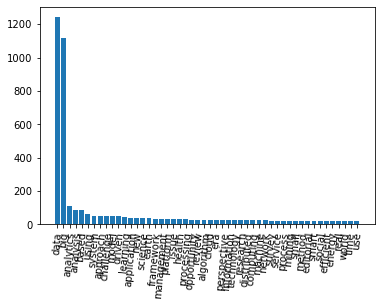

In [68]:
sorted_Keys = sorted(word_count, key = word_count.get, reverse = True)
sorted_Values = sorted(word_count.values(), reverse = True)
plt.bar(range(len(word_count)), sorted_Values, align = 'center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation = '85')
plt.show()

In [61]:
all_files_data_concat['doc_count'] = 0
summary_year = all_files_data_concat.groupby('출판일', as_index=False)['doc_count'].count()
summary_year

,출판일,doc_count
0,1995,1
1,2003,1
2,2004,1
3,2006,1
4,2008,1
5,2009,1
6,2011,7
7,2012,21
8,2013,52
9,2014,139


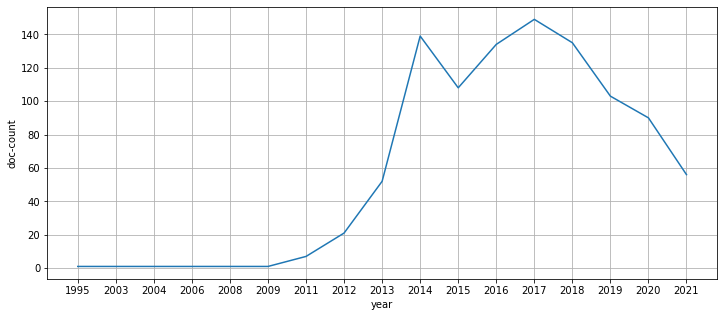

In [63]:
plt.figure(figsize = (12, 5))
plt.xlabel("year")
plt.ylabel("doc-count")
plt.grid(True)
plt.plot(range(len(summary_year)), summary_year['doc_count'])
plt.xticks(range(len(summary_year)), [text for text in summary_year['출판일']])
plt.show()

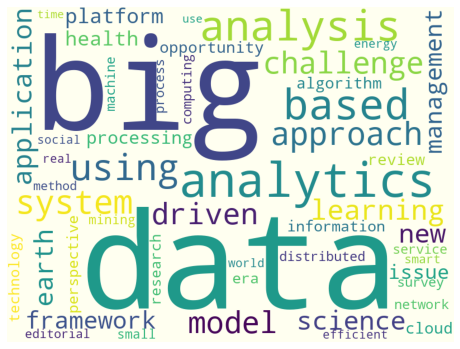

In [70]:
stopwords = set(STOPWORDS)
wc = WordCloud(background_color='ivory', stopwords=stopwords, width=800, height=600)
cloud = wc.generate_from_frequencies(word_count)
plt.figure(figsize = (8, 8))
plt.imshow(cloud)
plt.axis('off')
plt.show()